In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize'] = 10,12

import warnings
warnings.filterwarnings('ignore')

**Part 1 : Analyzing the present Condition in USA**

**How it started in USA?**

On 20 january,the first known case of COVID-19 was confirmed in the Pacific Northwest state of Washington in a man who had returned from Wuhan on 15 january.Then,the first death happend in february.By the end of March,cases had occurred in all 50 US states.As of June 24 2020,U.S had the most confirmed active cases and deaths in the world.In july 24,2020, USA becomes the eleventh-highest deathrate globally.

Even there is an exponential growth in this pandemic,eventually the growth slows down and flatterns the curve and we end up with a sigmoid

**Part 1.1 Reading Datasets**

In [ ]:
df = pd.read_excel('/content/USA_book.xlsx')
df_USA = df.copy()
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2,USA,North America,United States,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
3,USA,North America,United States,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
4,USA,North America,United States,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,VIR,North America,United States Virgin Islands,2020-07-21,308.0,11.0,6.0,0.0,2949.542,105.341,57.459,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104423.0,306.480,42.2,18.601,10.799,NaN,NaN,273.670,12.26,NaN,NaN,NaN,NaN,80.58
328,VIR,North America,United States Virgin Islands,2020-07-22,320.0,12.0,7.0,1.0,3064.459,114.917,67.035,9.576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104423.0,306.480,42.2,18.601,10.799,NaN,NaN,273.670,12.26,NaN,NaN,NaN,NaN,80.58
329,VIR,North America,United States Virgin Islands,2020-07-23,336.0,16.0,7.0,0.0,3217.682,153.223,67.035,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104423.0,306.480,42.2,18.601,10.799,NaN,NaN,273.670,12.26,NaN,NaN,NaN,NaN,80.58
330,VIR,North America,United States Virgin Islands,2020-07-24,336.0,0.0,7.0,0.0,3217.682,0.000,67.035,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104423.0,306.480,42.2,18.601,10.799,NaN,NaN,273.670,12.26,NaN,NaN,NaN,NaN,80.58


In [ ]:
USA_coord = pd.read_excel('/content/coordinates.xlsx')

**1.2 Analysing COVID19 Cases in USA**

In [ ]:
df.style.background_gradient(cmap='Reds')

**Visualization Inference:**

On the date of '2020-07-25' ,

1.   Total_cases = 4112529.000000
2.   New_cases = 78427.000000
3.   Total deaths = 145546.000000
4.   New_Deaths = 1304.000000

When data have been analized by color downwards,up to certain row , there is no color indication.But after certain point, color starts to convert from none to extremly dark red in the speed of exponential rate.



**1.3 Active Covid Cases**

In [ ]:
df['Total Active'] = df['total_cases'] - df['total_deaths']
Tot_Cases = df.groupby('date')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Total Active
date,
2020-07-25,3967328.000000
2020-07-24,3890189.000000
2020-07-23,3828045.000000
2020-07-22,3760305.000000
2020-07-21,3689406.000000
2020-07-20,3633017.000000
2020-07-19,3571636.000000
2020-07-18,3508726.000000
2020-07-17,3438120.000000


**Visual inference**

Above visual representation shows the data inlcuding virgin islands and other 50 states.And , total active cases gained by only total deaths and total cases.(not total cured).According to above data,there is an exponential growth in total active cases by time.

**1.4 How the coronavirus cases are rising?**

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
dbd_USA = pd.read_excel('/content/USA-only.xlsx', parse_dates=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_USA['date'], y = dbd_USA['total_cases'], mode ='lines+markers', name='total_cases'))
fig.update_layout(title_text='Trend of CoronaVirus Cases in USA(Cumaltive cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()



In [ ]:
import plotly.express as px


In [ ]:
fig = px.bar(dbd_USA, x = "date", y = "new_cases", barmode = 'group', height=400)
fig.update_layout(title_text = 'Coronavirus new cases in usa daily basis ', plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:
fig = px.bar(dbd_USA, x = "date", y = "total_deaths", barmode = 'group', height=400)
fig.update_layout(title_text = 'Coronavirus total_deaths in usa daily basis ', plot_bgcolor='rgb(240, 240, 240)')

fig.show()

In [ ]:
fig = px.bar(dbd_USA, x = "date", y = "new_deaths", barmode = 'group', height=400)
fig.update_layout(title_text = 'Coronavirus new_deaths in usa daily basis ', plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_USA['date'], y = dbd_USA['stringency_index'], mode ='lines+markers', name='total_cases'))
fig.update_layout(title_text='stringency_index in USA(Cumaltive cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
fig = px.bar(dbd_USA, x = "date", y = "total_tests", barmode = 'group', height=400)
fig.update_layout(title_text = 'Coronavirus total tests in usa daily basis ', plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:
fig = px.bar(dbd_USA, x = "date", y = "new_tests", barmode = 'group', height=400)
fig.update_layout(title_text = 'Coronavirus new tests in usa daily basis ', plot_bgcolor='rgb(230, 230, 230)')

fig.show()

**Visual inference**

***Why United States can't control the pandemice even they have the highest testing per daily basis and incrementing daily testing rate?***

**USA in the stage 4 which means disease takes shape of an epidemic with no clear endpoint.Official assumption is that after  the first occurance of covid19 case,state of no quick response or no testing lead usa to today's threaten situation.Even though USA have the most PCR testing per daily basis,country can't control the pandemic due to some root factors.Those root factors affects the prediction of situation in 27 july to 15 august.**

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('date').sum()['total_cases'].reset_index()
deaths = df.groupby('date').sum()['total_deaths'].reset_index()


In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds'] =pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.tail()

,ds,y
203,2020-07-21,3830318.0
204,2020-07-22,3902378.0
205,2020-07-23,3971242.0
206,2020-07-24,4034438.0
207,2020-07-25,4112881.0


**2.Forecasting Confirmed cases with prophet**

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
210,2020-07-28
211,2020-07-29
212,2020-07-30
213,2020-07-31
214,2020-08-01


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
210,2020-07-28,4.028687e+06,3.919967e+06,4.132439e+06
211,2020-07-29,4.076280e+06,3.982401e+06,4.182956e+06
212,2020-07-30,4.123902e+06,4.015829e+06,4.232131e+06
213,2020-07-31,4.172806e+06,4.067771e+06,4.284131e+06
214,2020-08-01,4.222744e+06,4.107732e+06,4.322715e+06


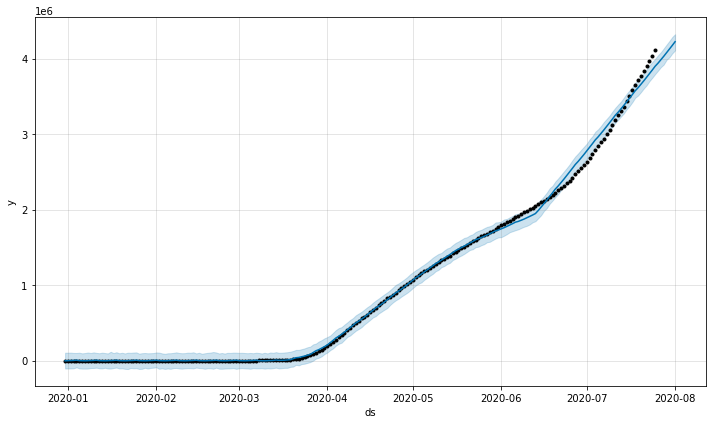

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

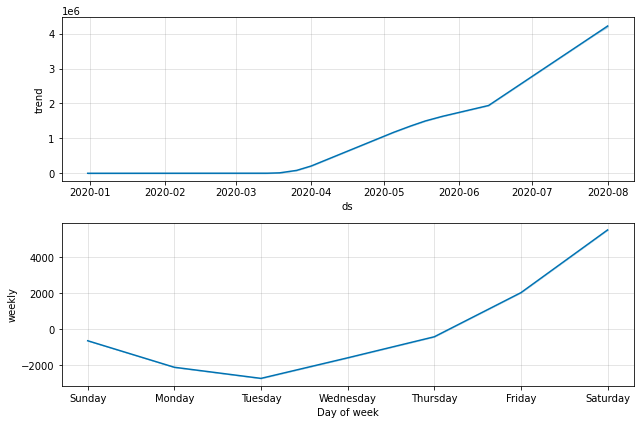

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

**3.Forecasting death cases with prophet**

In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
210,2020-07-28
211,2020-07-29
212,2020-07-30
213,2020-07-31
214,2020-08-01


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
210,2020-07-28,145988.850908,145101.782792,146749.624445
211,2020-07-29,146883.242020,145831.554007,147881.655498
212,2020-07-30,147783.029631,146364.267785,148941.462221
213,2020-07-31,148636.498724,146849.349948,150172.754636
214,2020-08-01,149401.268170,147118.681991,151417.194801


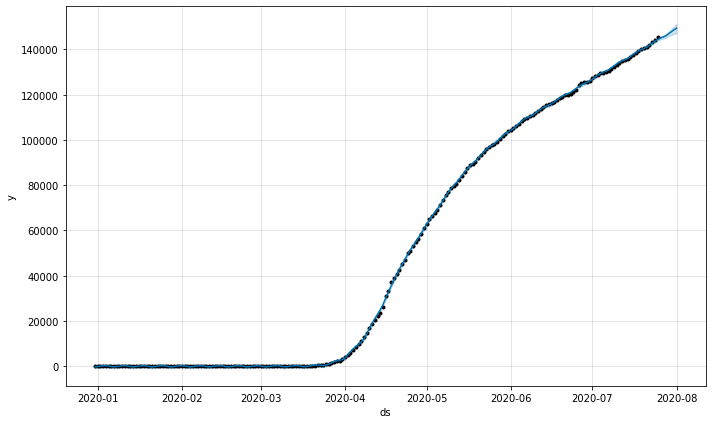

In [ ]:
deaths_forecast_plot = m.plot(forecast)

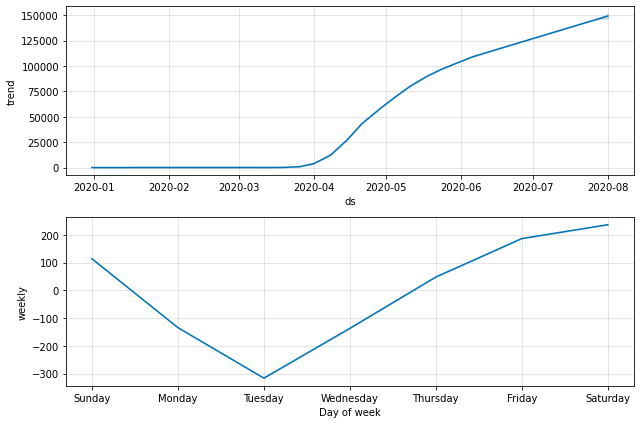

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

**Conclusion**